In [1]:
from a2_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import os

In [2]:
# (a) Firstly, you will implement the function myhist3 that computes a 3-D histogram from a three channel image.
# The images you will use are RGB, but the function should also work on other color spaces.


def myhist3(image, n_bins, color='rgb'):
    if color == 'hsv':
        image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

    if color == 'gbr':
        image = cv2.cvtColor(image, cv2.COLOR_GBR2RGB)

    H = np.zeros((n_bins, n_bins, n_bins))
    for row in image:
        for pixel in row:
            idx_r = math.floor(pixel[0] * n_bins)
            idx_g = math.floor(pixel[1] * n_bins)
            idx_b = math.floor(pixel[2] * n_bins)
            if idx_r == n_bins:
                idx_r -= 1
            if idx_g == n_bins:
                idx_g -= 1
            if idx_b == n_bins:
                idx_b -= 1
            H[idx_r, idx_g, idx_b] += 1
    return H / np.sum(H)


# obama_colored = cv2.imread('images/obama.jpg') / 255
# hist_3d = myhist3(obama_colored, 3)

In [3]:
# (b) Implement a function compare_histograms that accepts two histograms and a string
# that identifies the distance measure you wish to calculate. You can start with the L2 metric.


def compare_histograms(hist1, hist2, distance_measure):
    if distance_measure == 'L2':
        distance = np.sum((hist1 - hist2) ** 2) ** (1 / 2)
    elif distance_measure == 'chi-square':
        distance = (1 / 2) * np.sum(((hist1 - hist2) ** 2) /
                                    (hist1 + hist2 + 1e-10))
    elif distance_measure == 'intersection':
        distance = 1 - np.sum(np.minimum(hist1, hist2))
    elif distance_measure == 'hellinger':
        distance = (
            (1 / 2) * np.sum((hist1 ** (1 / 2) - hist2 ** (1 / 2)) ** 2)) ** (1 / 2)
    return distance

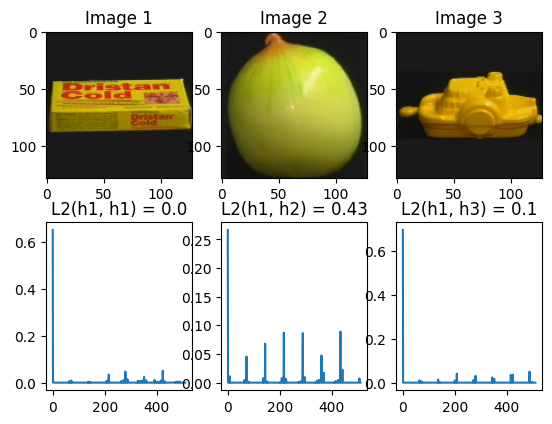

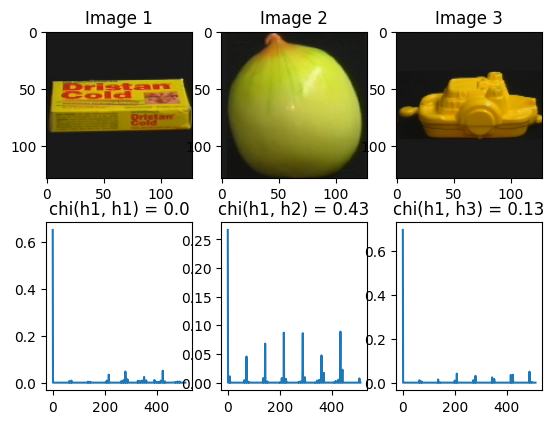

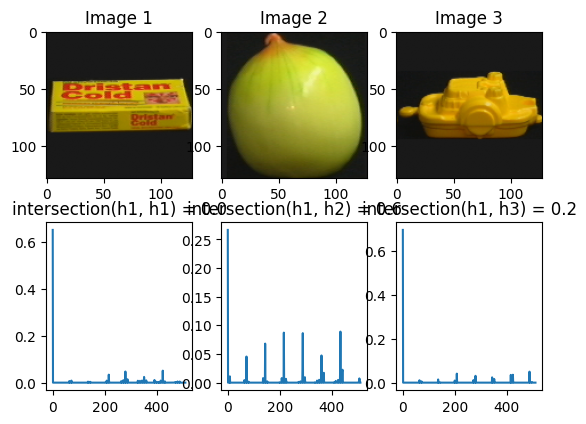

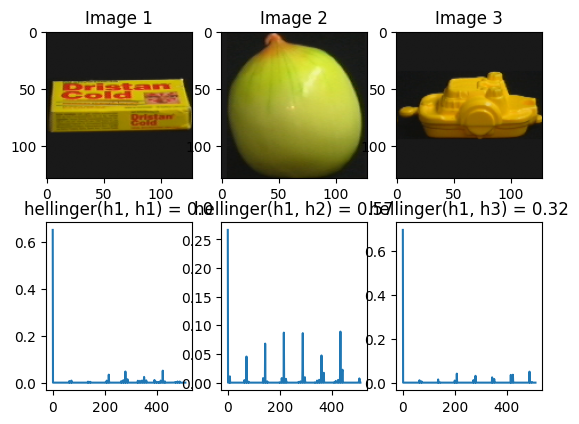

In [4]:

# (c) Test your function with the following images
image1 = cv2.imread('dataset/object_01_1.png')
image2 = cv2.imread('dataset/object_02_1.png')
image3 = cv2.imread('dataset/object_03_1.png')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) / 255
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) / 255
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB) / 255

n_bins = 8

hist1 = myhist3(image1, n_bins).reshape(-1)
hist2 = myhist3(image2, n_bins).reshape(-1)
hist3 = myhist3(image3, n_bins).reshape(-1)

distance_1_1 = round(compare_histograms(hist1, hist1, 'L2'), 2)
distance_1_2 = round(compare_histograms(hist1, hist2, 'L2'), 2)
distance_1_3 = round(compare_histograms(hist1, hist3, 'L2'), 2)

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.subplot(2, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.subplot(2, 3, 3)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(2, 3, 4)
plt.plot(hist1)
plt.title('L2(h1, h1) = ' + str(distance_1_1))
plt.subplot(2, 3, 5)
plt.plot(hist2)
plt.title('L2(h1, h2) = ' + str(distance_1_2))
plt.subplot(2, 3, 6)
plt.plot(hist3)
plt.title('L2(h1, h3) = ' + str(distance_1_3))
plt.show()

distance_1_1_chi = round(compare_histograms(hist1, hist1, 'chi-square'), 2)
distance_1_2_chi = round(compare_histograms(hist1, hist2, 'chi-square'), 2)
distance_1_3_chi = round(compare_histograms(hist1, hist3, 'chi-square'), 2)

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.subplot(2, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.subplot(2, 3, 3)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(2, 3, 4)
plt.plot(hist1)
plt.title('chi(h1, h1) = ' + str(distance_1_1_chi))
plt.subplot(2, 3, 5)
plt.plot(hist2)
plt.title('chi(h1, h2) = ' + str(distance_1_2_chi))
plt.subplot(2, 3, 6)
plt.plot(hist3)
plt.title('chi(h1, h3) = ' + str(distance_1_3_chi))
plt.show()

distance_1_1_intersection = round(
    compare_histograms(hist1, hist1, 'intersection'), 2)
distance_1_2_intersection = round(
    compare_histograms(hist1, hist2, 'intersection'), 2)
distance_1_3_intersection = round(
    compare_histograms(hist1, hist3, 'intersection'), 2)

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.subplot(2, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.subplot(2, 3, 3)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(2, 3, 4)
plt.plot(hist1)
plt.title('intersection(h1, h1) = ' + str(distance_1_1_intersection))
plt.subplot(2, 3, 5)
plt.plot(hist2)
plt.title('intersection(h1, h2) = ' + str(distance_1_2_intersection))
plt.subplot(2, 3, 6)
plt.plot(hist3)
plt.title('intersection(h1, h3) = ' + str(distance_1_3_intersection))
plt.show()


distance_1_1_hellinger = round(
    compare_histograms(hist1, hist1, 'hellinger'), 2)
distance_1_2_hellinger = round(
    compare_histograms(hist1, hist2, 'hellinger'), 2)
distance_1_3_hellinger = round(
    compare_histograms(hist1, hist3, 'hellinger'), 2)

plt.subplot(2, 3, 1)
plt.imshow(image1)
plt.title('Image 1')
plt.subplot(2, 3, 2)
plt.imshow(image2)
plt.title('Image 2')
plt.subplot(2, 3, 3)
plt.imshow(image3)
plt.title('Image 3')
plt.subplot(2, 3, 4)
plt.plot(hist1)
plt.title('hellinger(h1, h1) = ' + str(distance_1_1_hellinger))
plt.subplot(2, 3, 5)
plt.plot(hist2)
plt.title('hellinger(h1, h2) = ' + str(distance_1_2_hellinger))
plt.subplot(2, 3, 6)
plt.plot(hist3)
plt.title('hellinger(h1, h3) = ' + str(distance_1_3_hellinger))
plt.show()

# Question: Which image (object_02_1.png or object_03_1.png) is more similar to image object_01_1.png
# considering the L2 distance? How about the other three distances? We can see that all three histograms
# contain a strongly expressed com- ponent (one bin has a much higher value than the others).
# Which color does this bin represent?
# The third image (object_03_1.png) has lowe L2 distance, which means it is more similar.
# Same for all the distances
# That bin represents the color black


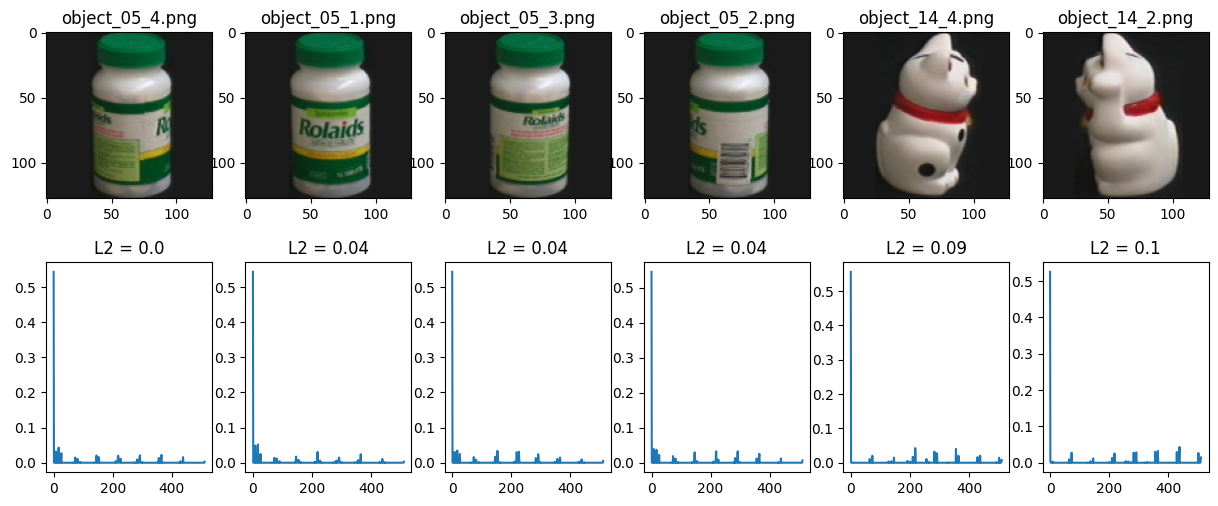

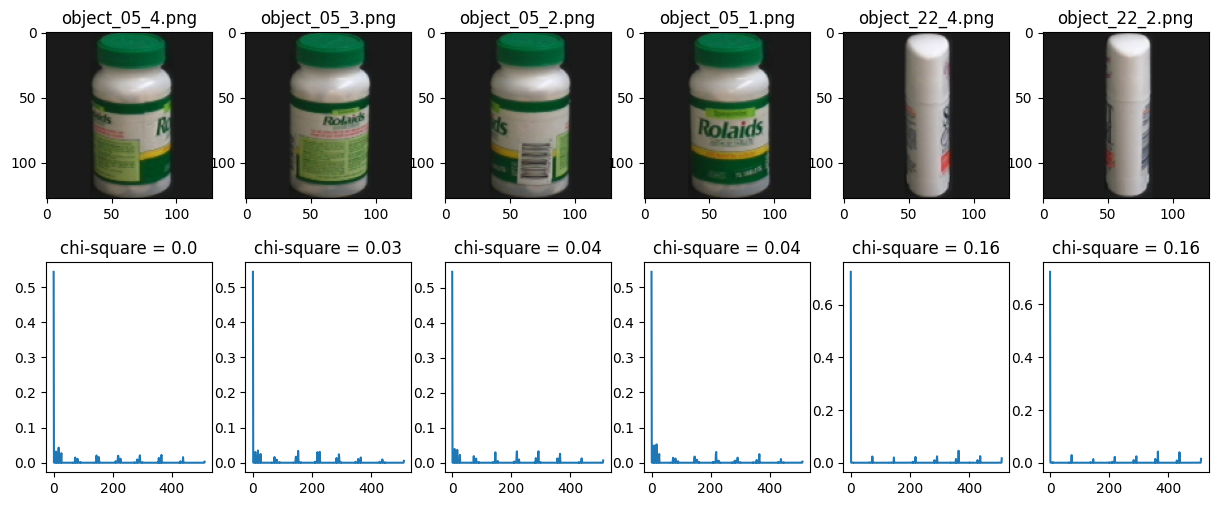

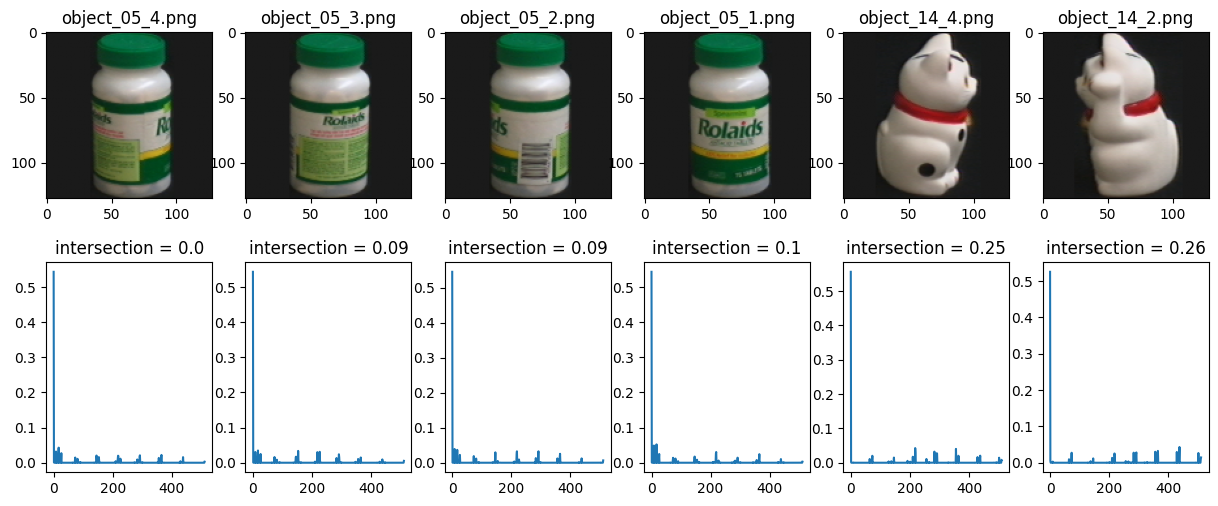

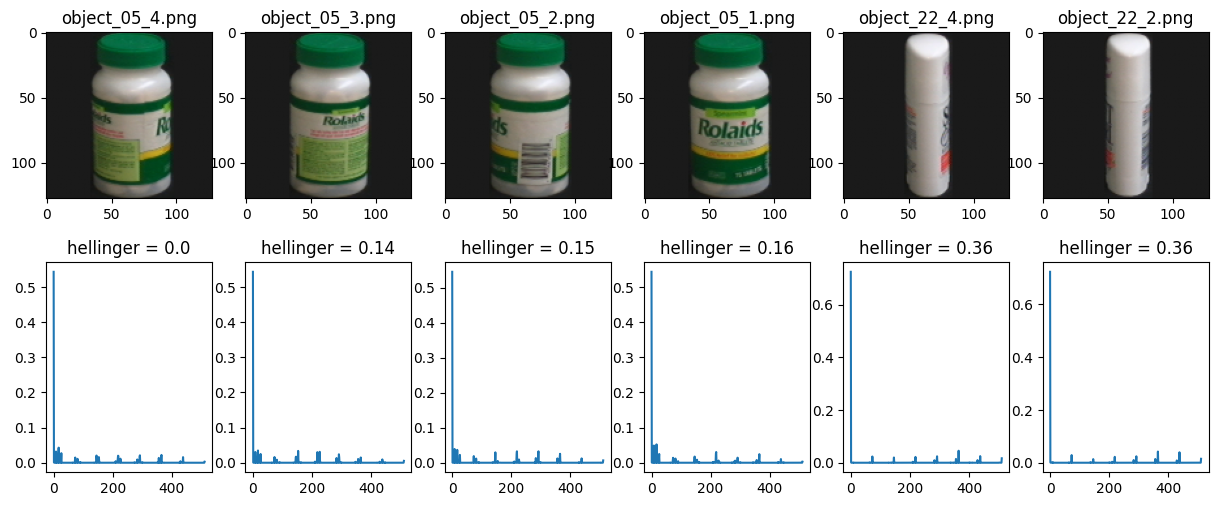

In [5]:

# (d) Write a function that will accept the path to the image directory and the parameter n_bins
# and then calculate RGB histograms for all images in the directory as well as transform them to 1-D arrays.
# Store the histograms in an appropriate data structure.


def calculate_rgb_histograms(image_directory, n_bins):
    image_histograms = {}
    # get the files in the directory in a list
    image_files = [img for img in os.listdir(image_directory)]
    # go through all images
    for img in image_files:
        # calculate the path of the image
        image_path = os.path.join(image_directory, img)
        # read the image
        image = cv2.imread(image_path)
        # change the image to rgb
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255
        # caluclate its histogram
        hist = myhist3(image, n_bins).reshape(-1)
        image_histograms[image_path] = hist

    return image_histograms


def compute_distances(histograms, main_img, distance_measure):
    distances = {}
    for image, hist in histograms.items():
        dist = compare_histograms(
            histograms[main_img], hist, distance_measure)
        distances[image] = dist
    return distances


path = 'dataset'
histograms = calculate_rgb_histograms(path, 8)
main_img_path = 'dataset/object_05_4.png'

# go through all distances
for distance_measure in ['L2', 'chi-square', 'intersection', 'hellinger']:
    # calculate the distances for every image
    distances = compute_distances(histograms, main_img_path, distance_measure)
    # sort the distances by the distances
    sorted_distances = dict(sorted(distances.items(), key=lambda x: x[1]))
    # read the main image
    main_img = cv2.imread(main_img_path)
    main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB) / 255
    plt.figure(figsize=(15, 6))

    # show the main image
    plt.subplot(2, 6, 1)
    plt.imshow(main_img)
    plt.title(main_img_path[8:])
    plt.subplot(2, 6, 7)
    plt.plot(histograms[main_img_path])
    plt.title(distance_measure + ' = ' +
              str(round(distances[main_img_path], 2)))

    idx = 2
    # go through the first 5 sorted images
    for image_path, distance in list(sorted_distances.items())[1:6]:
        # read the image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
        # show the image, its histogram, and its distance
        plt.subplot(2, 6, idx)
        plt.imshow(img)
        plt.title(image_path[8:])
        plt.subplot(2, 6, idx + 6)
        plt.plot(histograms[image_path])
        plt.title(distance_measure + ' = ' + str(round(distance, 2)))
        idx += 1

    plt.show()

# Question: Which distance is in your opinion best suited for image retrieval?
# How does the retrieved sequence change if you use a different number of bins?
# Is the execution time affected by the number of bins?


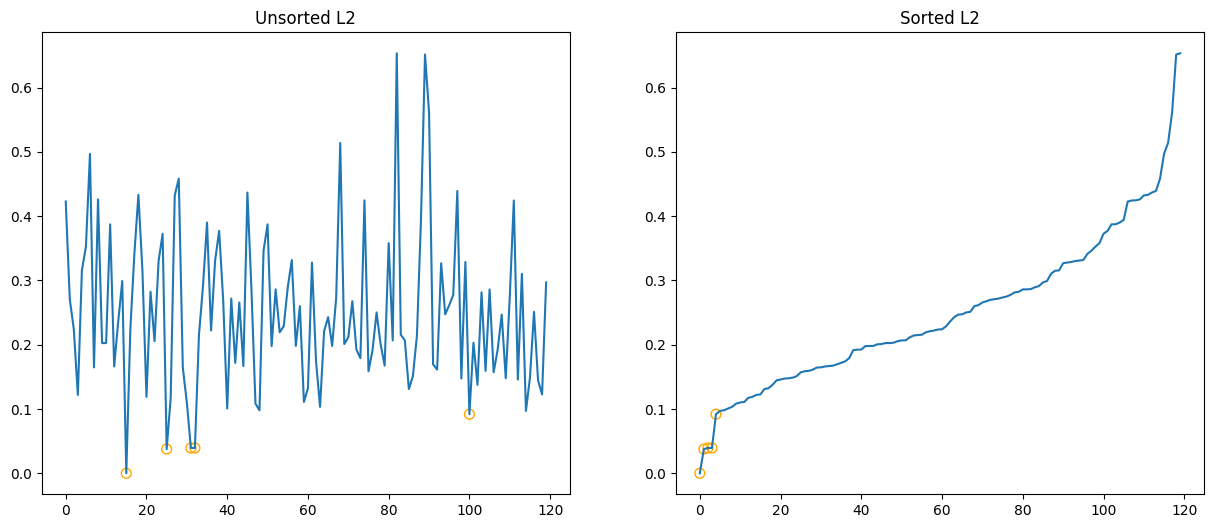

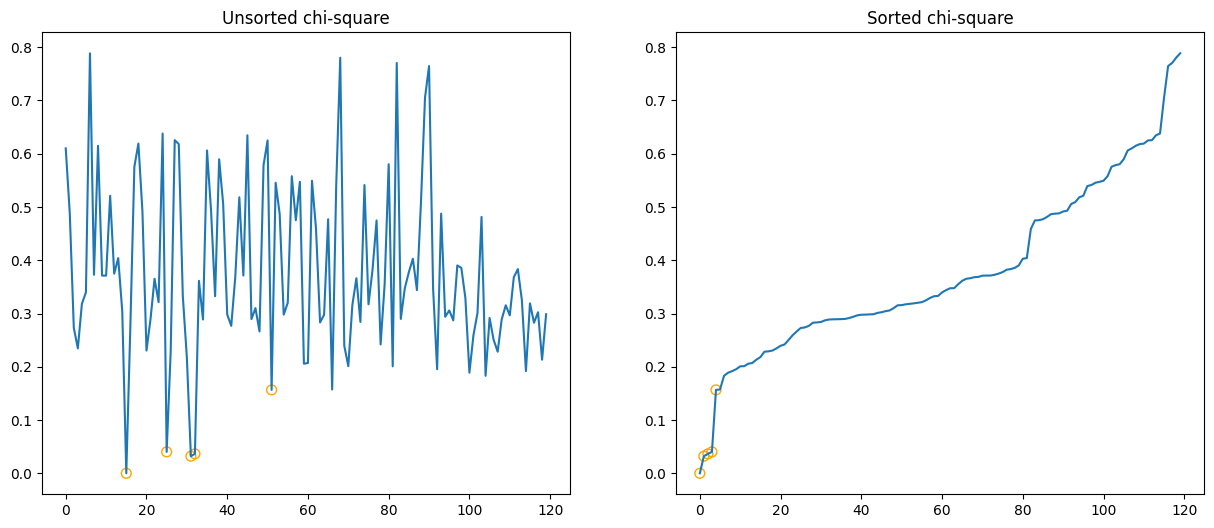

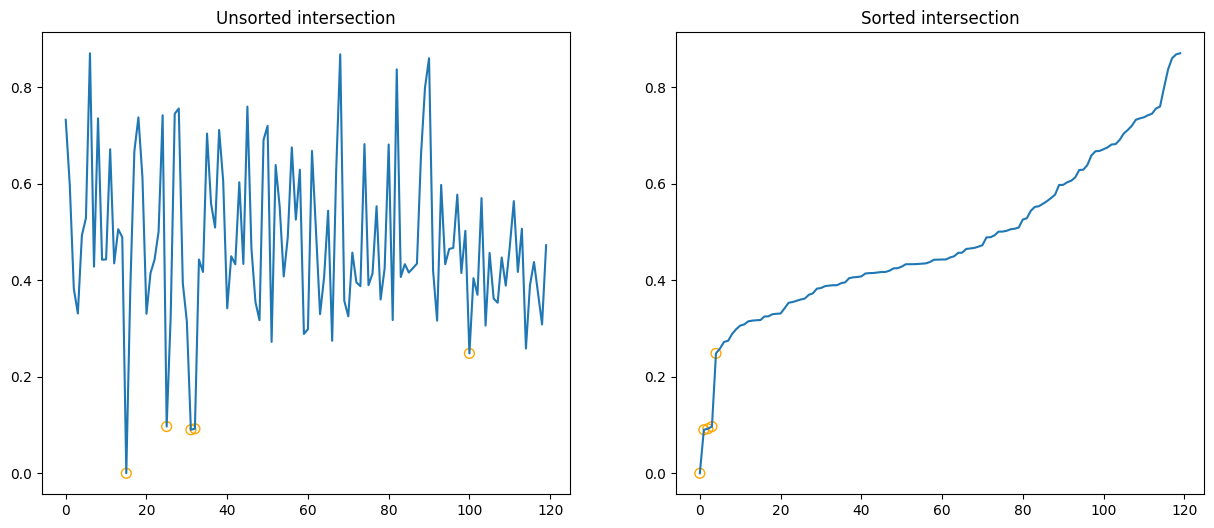

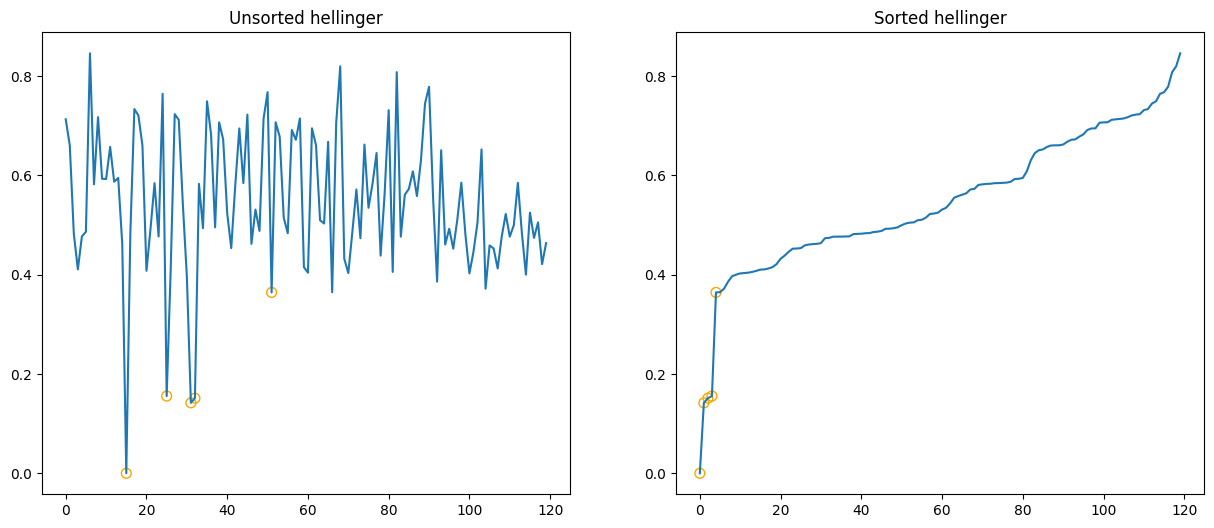

In [6]:
# (e) Use the function plt.plot() to display image indices on the x axis and distances to the reference image on the y axis.
# Display both the unsorted and the sorted image sequence, and mark the most similar values using a circle


for distance_measure_1 in ['L2', 'chi-square', 'intersection', 'hellinger']:
    distances_1 = compute_distances(
        histograms, main_img_path, distance_measure_1)
    sorted_distances_1 = dict(sorted(distances_1.items(), key=lambda x: x[1]))
    top_5_indices = np.argsort(list(distances_1.values()))[:5]
    top_5_keys = np.array(list(distances_1.keys()))[top_5_indices]
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(distances_1.values())
    plt.scatter(top_5_indices, [distances_1[key]
                for key in top_5_keys], facecolor='none', edgecolor='orange',  s=50)
    plt.title('Unsorted ' + distance_measure_1)
    plt.subplot(1, 2, 2)
    plt.plot(sorted_distances_1.values())
    plt.scatter(np.arange(0, 5), list(sorted_distances_1.values())
                [:5], facecolor='none', edgecolor='orange',  s=50)
    plt.title('Sorted ' + distance_measure_1)
    plt.show()


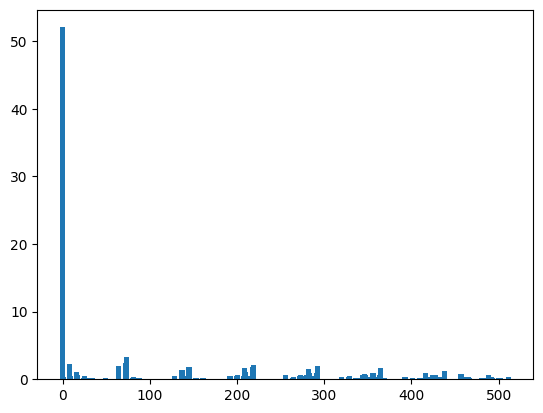

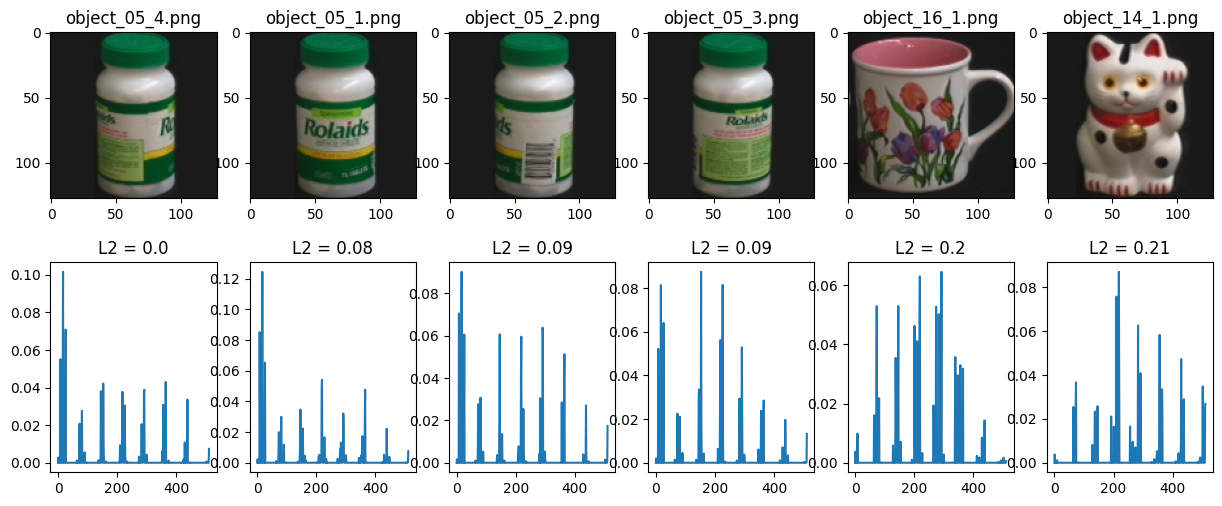

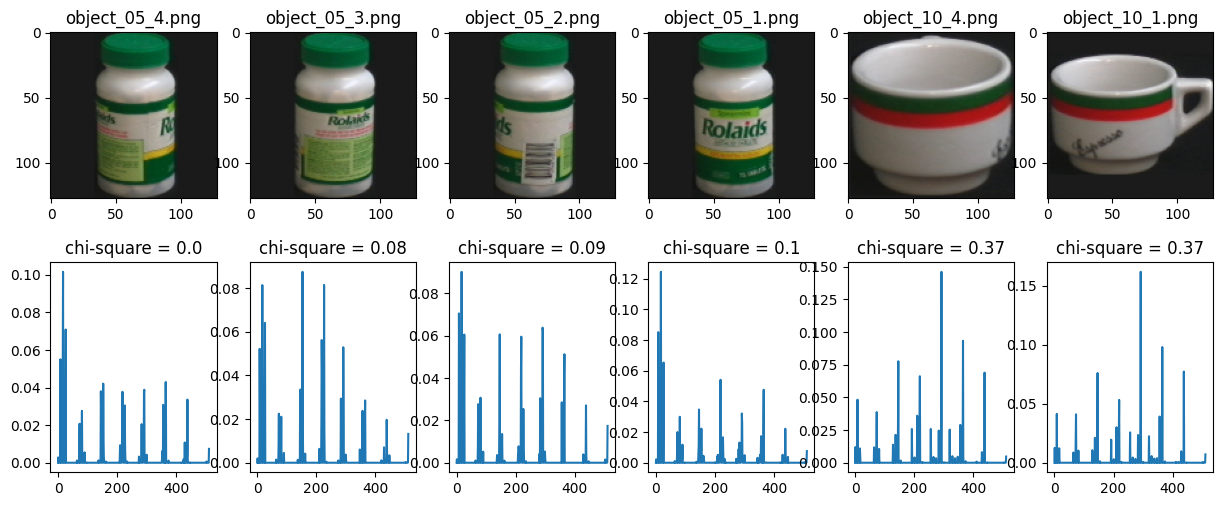

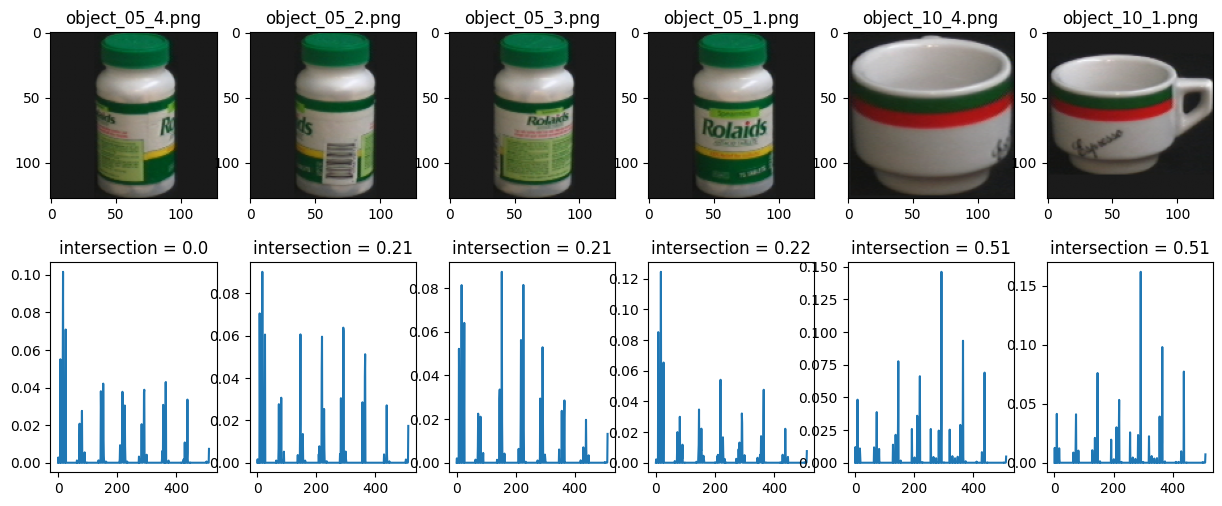

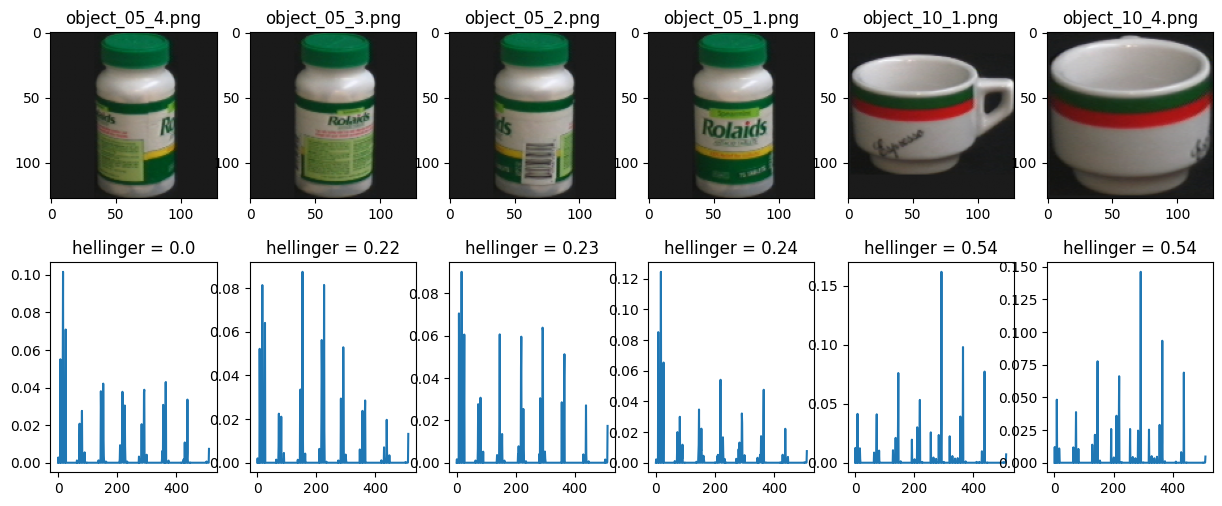

In [7]:
# (f) Analyze the presence of different colors by summing up all image histograms bin-wise and
#  displaying the resulting histogram. Which bins dominate this histogram?

hists = [histograms[img] for img in histograms]
sum_hist = np.sum(hists, axis=0)

plt.bar(np.arange(len(sum_hist)), sum_hist, width=6)
plt.show()

weighted_histograms = {}
weights = np.zeros(len(sum_hist))
for i in range(len(sum_hist)):
    lam = 0.2
    weights[i] = np.exp(-lam*sum_hist[i])

for img in histograms:
    weighted_hist = histograms[img] * weights
    weighted_histograms[img] = weighted_hist / np.sum(weighted_hist)

for distance_measure in ['L2', 'chi-square', 'intersection', 'hellinger']:
    distances = compute_distances(
        weighted_histograms, main_img_path, distance_measure)
    sorted_distances = dict(sorted(distances.items(), key=lambda x: x[1]))

    main_img = cv2.imread(main_img_path)
    main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB) / 255
    plt.figure(figsize=(15, 6))

    plt.subplot(2, 6, 1)
    plt.imshow(main_img)
    plt.title(main_img_path[8:])
    plt.subplot(2, 6, 7)
    plt.plot(weighted_histograms[main_img_path])
    plt.title(distance_measure + ' = ' +
              str(round(distances[main_img_path], 2)))

    idx = 2
    for image_path, distance in list(sorted_distances.items())[1:6]:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
        plt.subplot(2, 6, idx)
        plt.imshow(img)
        plt.title(image_path[8:])
        plt.subplot(2, 6, idx + 6)
        plt.plot(weighted_histograms[image_path])
        plt.title(distance_measure + ' = ' + str(round(distance, 2)))
        idx += 1

    plt.show()
